# Early stage diabetes risk prediction

1. Introduction
2. Data
3. EDA
4. Data Engineering/cleaning
5. Model Building
6. Test

<h1>1. Introduction

Would it be nice if we can find the early signs of diabetes? One of the promising application of machine learning can deliver just that. While this concept is nothing new and is probably already widely used in many medical fields, it could be very helpful for begging data scientists to see the work flow with different datasets and style. Let's get to it.

<h1>2. Data

I acquire the data from University of California Irvine(https://archive.ics.uci.edu/ml/index.php) already in CSV format. Its size is relatively very small, 520 instances(rows) with 17 attributes(columns). The data was donated to UCI fairly recently on July 12th, 2020. Although metadata wrote that the data consists of missing values, I did not find any as you will see later.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('../diabetes_data.csv')

<h1> 3. EDA

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
df.shape

(520, 17)

In [6]:
# missing values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [8]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

,class
Positive,0.615385
Negative,0.384615


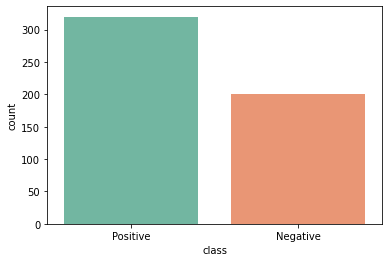

In [4]:
# graph of target variable
sns.countplot(x="class", data=df, palette = "Set2")

# table of target variable
df['class'].value_counts(normalize=True).to_frame()

Skewness: 0.3293593578272701
Kurtosis: -0.19170941407070163


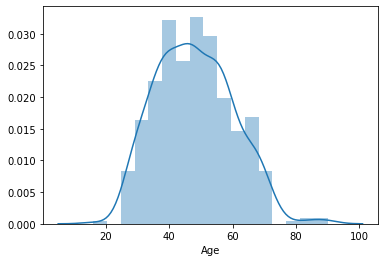

In [38]:
sns.distplot(df['Age'])
print('Skewness: '+ str(df['Age'].skew())) 
print("Kurtosis: " + str(df['Age'].kurt()))

kurtosis and skewness are in acceptable range.

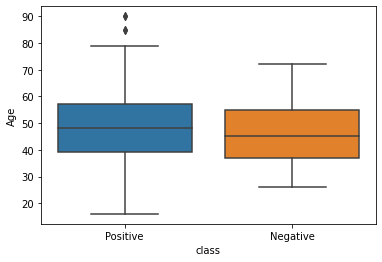

In [17]:
sns.boxplot(x="class", y="Age", data=df)

In [18]:
df.groupby(['Gender'])['class'].value_counts(normalize=True).to_frame()

class
Gender class             
Female Positive  0.901042
       Negative  0.098958
Male   Negative  0.551829
       Positive  0.448171

In [19]:
pd.crosstab(df.Gender, df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
Gender,,,
Female,19,173,192
Male,181,147,328
All,200,320,520


In [25]:
df.groupby(['Obesity'])['class'].value_counts(normalize=True).to_frame()

class
Obesity class             
No      Positive  0.599537
        Negative  0.400463
Yes     Positive  0.693182
        Negative  0.306818

In [26]:
pd.crosstab(df['Obesity'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
Obesity,,,
No,173,259,432
Yes,27,61,88
All,200,320,520


In [24]:
df.groupby(['muscle stiffness'])['class'].value_counts(normalize=True).to_frame()

class
muscle stiffness class             
No               Positive  0.569231
                 Negative  0.430769
Yes              Positive  0.692308
                 Negative  0.307692

In [50]:
pd.crosstab(df['muscle stiffness'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,0,1,All
muscle stiffness,,,
No,140,185,325
Yes,60,135,195
All,200,320,520


In [27]:
df.groupby(['Alopecia'])['class'].value_counts(normalize=True).to_frame()

class
Alopecia class             
No       Positive  0.709677
         Negative  0.290323
Yes      Negative  0.564246
         Positive  0.435754

In [28]:
pd.crosstab(df['Alopecia'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
Alopecia,,,
No,99,242,341
Yes,101,78,179
All,200,320,520


In [29]:
df.groupby(['partial paresis'])['class'].value_counts(normalize=True).to_frame()

class
partial paresis class             
No              Negative  0.567568
                Positive  0.432432
Yes             Positive  0.857143
                Negative  0.142857

In [30]:
pd.crosstab(df['partial paresis'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
partial paresis,,,
No,168,128,296
Yes,32,192,224
All,200,320,520


In [31]:
df.groupby(['delayed healing'])['class'].value_counts(normalize=True).to_frame()

class
delayed healing class             
No              Positive  0.594306
                Negative  0.405694
Yes             Positive  0.640167
                Negative  0.359833

In [32]:
pd.crosstab(df['delayed healing'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
delayed healing,,,
No,114,167,281
Yes,86,153,239
All,200,320,520


In [33]:
df.groupby(['Irritability'])['class'].value_counts(normalize=True).to_frame()

class
Irritability class             
No           Positive  0.532995
             Negative  0.467005
Yes          Positive  0.873016
             Negative  0.126984

In [34]:
pd.crosstab(df['Irritability'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
Irritability,,,
No,184,210,394
Yes,16,110,126
All,200,320,520


In [35]:
df.groupby(['Itching'])['class'].value_counts(normalize=True).to_frame()

class
Itching class             
No      Positive  0.621723
        Negative  0.378277
Yes     Positive  0.608696
        Negative  0.391304

In [37]:
pd.crosstab(df['Itching'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
Itching,,,
No,101,166,267
Yes,99,154,253
All,200,320,520


In [36]:
df.groupby(['visual blurring'])['class'].value_counts(normalize=True).to_frame()

class
visual blurring class             
No              Positive  0.505226
                Negative  0.494774
Yes             Positive  0.751073
                Negative  0.248927

In [38]:
pd.crosstab(df['visual blurring'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
visual blurring,,,
No,142,145,287
Yes,58,175,233
All,200,320,520


In [39]:
df.groupby(['Genital thrush'])['class'].value_counts(normalize=True).to_frame()

class
Genital thrush class             
No             Positive  0.586634
               Negative  0.413366
Yes            Positive  0.715517
               Negative  0.284483

In [40]:
pd.crosstab(df['Genital thrush'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
Genital thrush,,,
No,167,237,404
Yes,33,83,116
All,200,320,520


In [41]:
df.groupby(['Polyphagia'])['class'].value_counts(normalize=True).to_frame()

class
Polyphagia class             
No         Negative  0.537102
           Positive  0.462898
Yes        Positive  0.797468
           Negative  0.202532

In [42]:
pd.crosstab(df['Polyphagia'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
Polyphagia,,,
No,152,131,283
Yes,48,189,237
All,200,320,520


In [43]:
df.groupby(['weakness'])['class'].value_counts(normalize=True).to_frame()

class
weakness class             
No       Negative  0.525581
         Positive  0.474419
Yes      Positive  0.714754
         Negative  0.285246

In [44]:
pd.crosstab(df['weakness'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
weakness,,,
No,113,102,215
Yes,87,218,305
All,200,320,520


In [45]:
df.groupby(['sudden weight loss'])['class'].value_counts(normalize=True).to_frame()

class
sudden weight loss class             
No                 Negative  0.564356
                   Positive  0.435644
Yes                Positive  0.866359
                   Negative  0.133641

In [46]:
pd.crosstab(df['sudden weight loss'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
sudden weight loss,,,
No,171,132,303
Yes,29,188,217
All,200,320,520


In [47]:
df.groupby(['Polydipsia'])['class'].value_counts(normalize=True).to_frame()

class
Polydipsia class             
No         Negative  0.668990
           Positive  0.331010
Yes        Positive  0.965665
           Negative  0.034335

In [48]:
pd.crosstab(df['Polydipsia'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
Polydipsia,,,
No,192,95,287
Yes,8,225,233
All,200,320,520


In [49]:
df.groupby(['Polyuria'])['class'].value_counts(normalize=True).to_frame()

class
Polyuria class             
No       Negative  0.706107
         Positive  0.293893
Yes      Positive  0.941860
         Negative  0.058140

In [50]:
pd.crosstab(df['Polyuria'], df['class'], margins=True).style.background_gradient(cmap='summer_r')

class,Negative,Positive,All
Polyuria,,,
No,185,77,262
Yes,15,243,258
All,200,320,520


<h1>Data Engineering/Cleaning

In [28]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_feats] = scaler.fit_transform(df[numeric_feats])      #standardscaler transform the Age column

In [29]:
df['class'] = df['class'].replace({'Negative': 0, 'Positive': 1})  #replace string to binary 0/1
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['Polyuria'] = df['Polyuria'].replace({'Yes': 1, 'No': 0})
df['Polydipsia'] = df['Polydipsia'].replace({'Yes': 1, 'No': 0})
df['sudden weight loss'] = df['sudden weight loss'].replace({'Yes': 1, 'No': 0})
df['weakness'] = df['weakness'].replace({'Yes': 1, 'No': 0})
df['Polyphagia'] = df['Polyphagia'].replace({'Yes': 1, 'No': 0})
df['Genital thrush'] = df['Genital thrush'].replace({'Yes': 1, 'No': 0})
df['visual blurring'] = df['visual blurring'].replace({'Yes': 1, 'No': 0})
df['Irritability'] = df['Irritability'].replace({'Yes': 1, 'No': 0})
df['partial paresis'] = df['partial paresis'].replace({'Yes': 1, 'No': 0})
df['muscle stiffness'] = df['muscle stiffness'].replace({'Yes': 1, 'No': 0})
df['Alopecia'] = df['Alopecia'].replace({'Yes': 1, 'No': 0})
df['Obesity'] = df['Obesity'].replace({'Yes': 1, 'No': 0})

In [30]:
df_train = df.sample(frac = 0.8)    #train/cross-val
df_test = df.drop(df_train.index)   #test

In [31]:
X = df_test.drop(columns=['Itching', 'delayed healing', 'class'])     #independent variable for testing
x = df_train.drop(columns=['Itching', 'delayed healing', 'class'])    #independent variable for training/cross-validation
x

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,partial paresis,muscle stiffness,Alopecia,Obesity
18,1.480353,0,1,1,0,1,1,0,1,0,1,1,0,0
426,0.491867,0,1,1,1,1,1,1,1,0,0,1,1,0
307,-0.908488,0,0,0,0,0,0,0,0,0,0,0,0,0
518,-1.320358,1,0,0,0,1,0,0,1,0,0,0,1,0
332,0.162372,1,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.162372,1,0,1,0,1,1,0,1,1,1,1,0,0
291,-1.485105,0,0,0,0,0,0,0,0,0,0,0,0,0
175,-1.485105,1,1,0,1,1,1,0,0,0,0,0,0,0
387,-0.990862,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
Y = df_test['class'].values     #target variable for testing
y = df_train['class'].values    #target variable for training/cross-validation
y

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,

# Model Building

In [33]:
# Root mean square error by juliencs from https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

scorer = make_scorer(mean_squared_error, greater_is_better = False)
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

<h3>Decision Tree

In [34]:
from sklearn import tree

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [36]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
tree_model.score(X_test, y_test)

0.9642857142857143

In [38]:
scores = cross_val_score(tree_model, x, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("RMSE on Training set :", rmse_cv_train(tree_model).mean())

Accuracy: 0.96 (+/- 0.02)
RMSE on Training set : 0.19078694994190604


<h3> Logistic Reg

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [41]:
LR_model.score(X_test, y_test)

0.9642857142857143

In [ ]:
scores = cross_val_score(LR_model, x, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("RMSE on Training set :", rmse_cv_train(LR_model).mean())

<h3>KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
KNN_model.score(X_test, y_test)

0.8928571428571429

In [20]:
scores = cross_val_score(KNN_model, x, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("RMSE on Training set :", rmse_cv_train(KNN_model).mean())

Accuracy: 0.87 (+/- 0.05)
RMSE on Training set : 0.3594944577798732


<h3>SVM

In [21]:
from sklearn import svm

In [22]:
svm_model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
svm_model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [23]:
svm_model.score(X_test, y_test)

0.9166666666666666

In [24]:
scores = cross_val_score(svm_model, x, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("RMSE on Training set :", rmse_cv_train(svm_model).mean())

Accuracy: 0.91 (+/- 0.05)
RMSE on Training set : 0.2877108307793129


<h1>Test

In [25]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# knn F1&jaccard score
knn_yhat = KNN_model.predict(X)
knn_f1 = round(f1_score(Y, knn_yhat, average='weighted'), 2)
knn_jaccard = round(jaccard_score(Y, knn_yhat), 2)

# Decision Tree F1&jaccard score
DT_yhat = tree_model.predict(X)
DT_f1 = round(f1_score(Y, DT_yhat, average='weighted'), 2)
DT_jaccard = round(jaccard_score(Y, DT_yhat), 2)

# Support Vector Machine Tree F1&jaccard score
svm_yhat = svm_model.predict(X)
svm_f1 = round(f1_score(Y, svm_yhat, average='weighted'), 2)
svm_jaccard = round(jaccard_score(Y, svm_yhat), 2)

# Logistic Regression F1&jaccard& logloss score
LR_yhat = LR_model.predict(X)
LR_prob = LR_model.predict_proba(X)
LR_f1 = round(f1_score(Y, LR_yhat, average='weighted'), 2)
LR_jaccard = round(jaccard_score(Y, LR_yhat), 2)

# log loss
loss = round(log_loss(Y, LR_prob), 2)

In [26]:
# display reports
df_report = pd.DataFrame(np.array([['KNN', knn_jaccard, knn_f1,'NA'], 
                                   ['Decision Tree',DT_jaccard, DT_f1,'NA'], 
                                   ['SVM',svm_f1, svm_f1,'NA'],
                                   ["LogisticRegression", LR_jaccard, LR_f1, loss]]),
                           columns=['Algorithm', 'Jaccard', 'F1-score', "LogLoss"])
df_report.set_index('Algorithm')

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.73,0.81,NA
Decision Tree,0.9,0.93,NA
SVM,0.9,0.9,NA
LogisticRegression,0.83,0.89,0.29
